In [1]:
import sys, os
import json
import torch

# Make sure src/ is visible
project_root = os.path.abspath(".")
if project_root not in sys.path:
    sys.path.append(project_root)

from src.config import config
from src.training.train import train_model

In [2]:
def build_config(overrides=None):
    cfg = config.copy()
    if overrides:
        cfg.update(overrides)
    return cfg

def show_config(cfg):
    for k, v in cfg.items():
        print(f"{k}: {v}")

In [3]:
import json
import os
import matplotlib.pyplot as plt

def plot_metrics(tokenizer_name: str, model_type: str, results_dir: str = "results"):
    """
    Load training metrics from JSON, plot training vs validation loss,
    auto-tighten the y-axis, and save the figure to results/pictures.
    """

    # ---- paths ----
    metrics_path = f"{results_dir}/metrics_{tokenizer_name}_{model_type}.json"
    pictures_dir = f"{results_dir}/pictures"
    os.makedirs(pictures_dir, exist_ok=True)

    # ---- load JSON ----
    with open(metrics_path, "r") as f:
        metrics = json.load(f)

    epochs = [m["epoch"] for m in metrics]
    train_losses = [m["train_loss"] for m in metrics]
    val_losses = [m["val_loss"] for m in metrics]

    # ---- plotting ----
    plt.figure(figsize=(7, 5))
    plt.plot(epochs, train_losses, marker="o", label="Train Loss")
    plt.plot(epochs, val_losses, marker="o", label="Validation Loss")

    # ---- tighten Y axis ----
    all_losses = train_losses + val_losses
    low = min(all_losses)
    high = max(all_losses)
    plt.ylim(low - 0.1, high * 2 + 3)

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Training vs Validation Loss ({tokenizer_name}-{model_type})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # ---- save file ----
    out_path = f"{pictures_dir}/{tokenizer_name}_{model_type}.png"
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.show()

    print(f"Saved plot to: {out_path}")

In [4]:
def run_training(tokenizer_name, model_type, cfg):
    print("Starting training with config:")
    show_config(cfg)

    # Your train_model already prints metrics and saves files.
    train_model(
        tokenizer_name=tokenizer_name,
        model_type=model_type,
        cfg_overrides=cfg
    )

word transformer

In [5]:
tokenizer_name = "word"          # or bpe, unigram, byte
model_type = "transformer"       # or lstm

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-3,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

dataset_name: wikitext-2-raw-v1
context_length: 128
batch_size: 32
num_epochs: 5
learning_rate: 0.001
model_dim: 128
num_layers: 2
num_heads: 2
dropout: 0.3
device: cuda
Starting training with config:
dataset_name: wikitext-2-raw-v1
context_length: 128
batch_size: 32
num_epochs: 5
learning_rate: 0.001
model_dim: 128
num_layers: 2
num_heads: 2
dropout: 0.3
device: cuda
new config
Starting training with tokenizer='word', model_type='transformer'
pad:0
Loading Wiki2...
Loaded Wiki2: 10000 train, 3760 val Dataset({
    features: ['text'],
    num_rows: 4358
}) test
Building tokenized datasets and dataloaders...
Dataloaders ready. Starting epochs...
Epoch 0 starting...


word-transformer epoch 0: 100%|███████████████████████████████████████████████████████████████████████████████| 17281/17281 [02:16<00:00, 126.50it/s]


Epoch 0: train_loss=6.1307
Epoch 0:
  nll/token       = 4.3247 nats
  perplexity      = 75.5458
  bits per token  = 6.2393
  nll/char        = 0.8099 nats
  bits per char   = 1.1684 bits
  tokens per char = 0.1873
Saved checkpoint to checkpoints/word_transformer_epoch0.pt
Epoch 1 starting...


word-transformer epoch 1: 100%|███████████████████████████████████████████████████████████████████████████████| 17281/17281 [02:11<00:00, 131.21it/s]


Epoch 1: train_loss=4.6150
Epoch 1:
  nll/token       = 4.2236 nats
  perplexity      = 68.2820
  bits per token  = 6.0934
  nll/char        = 0.7910 nats
  bits per char   = 1.1411 bits
  tokens per char = 0.1873
Saved checkpoint to checkpoints/word_transformer_epoch1.pt
Epoch 2 starting...


word-transformer epoch 2: 100%|███████████████████████████████████████████████████████████████████████████████| 17281/17281 [02:10<00:00, 132.43it/s]


Epoch 2: train_loss=4.4264
Epoch 2:
  nll/token       = 4.2243 nats
  perplexity      = 68.3291
  bits per token  = 6.0944
  nll/char        = 0.7911 nats
  bits per char   = 1.1413 bits
  tokens per char = 0.1873
Saved checkpoint to checkpoints/word_transformer_epoch2.pt
Epoch 3 starting...


word-transformer epoch 3: 100%|███████████████████████████████████████████████████████████████████████████████| 17281/17281 [02:05<00:00, 137.29it/s]


Epoch 3: train_loss=4.3416
Epoch 3:
  nll/token       = 4.2257 nats
  perplexity      = 68.4234
  bits per token  = 6.0964
  nll/char        = 0.7913 nats
  bits per char   = 1.1417 bits
  tokens per char = 0.1873
Saved checkpoint to checkpoints/word_transformer_epoch3.pt
Epoch 4 starting...


word-transformer epoch 4: 100%|███████████████████████████████████████████████████████████████████████████████| 17281/17281 [02:06<00:00, 136.88it/s]


Epoch 4: train_loss=4.3102
Epoch 4:
  nll/token       = 4.2275 nats
  perplexity      = 68.5442
  bits per token  = 6.0990
  nll/char        = 0.7917 nats
  bits per char   = 1.1421 bits
  tokens per char = 0.1873
Saved checkpoint to checkpoints/word_transformer_epoch4.pt


word lstm

In [ ]:
tokenizer_name = "word"          # or bpe, unigram, byte
model_type = "lstm"       # or lstm

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

bpe transformer

In [ ]:
tokenizer_name = "bpe"          # or bpe, unigram, byte
model_type = "transformer"       # or lstm

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 5e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics("word", "transformer")
plot_metrics(tokenizer_name, model_type)

bpe lstm

In [ ]:
tokenizer_name = "bpe"          # or bpe, unigram, byte
model_type = "lstm"       # or lstm

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

unigram transformer

In [ ]:
tokenizer_name = "unigram"          # or bpe, unigram, byte
model_type = "transformer"       # or lstm

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 5e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

unigram lstm

In [ ]:
tokenizer_name = "unigram"          # or bpe, unigram, byte
model_type = "lstm"       # or lstm

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

byte transformer

In [ ]:
tokenizer_name = "byte"          # or bpe, unigram, byte
model_type = "transformer"       # or lstm

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

byte lstm

In [ ]:
tokenizer_name = "byte"          # or bpe, unigram, byte
model_type = "lstm"       # or lstm

cfg_overrides = {
     "dataset_name": "wikitext-2-raw-v1",
    "context_length": 128,
    "batch_size": 32,
    "num_epochs": 5,
    "learning_rate": 1e-4,
    "model_dim": 128,
    "num_layers": 2,
    "num_heads": 2,
    "dropout": 0.3,
    "device": "cuda",
}

cfg = build_config(cfg_overrides)
show_config(cfg)
run_training(tokenizer_name, model_type, cfg)
plot_metrics(tokenizer_name, model_type)

Plotting word-transformer...


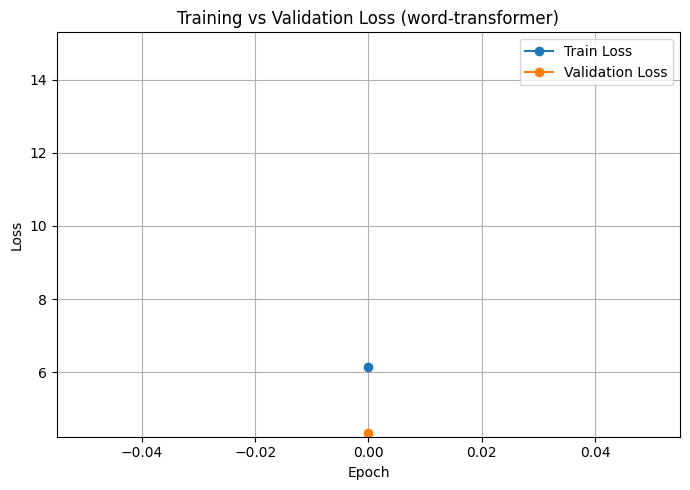

Saved plot to: results/pictures/word_transformer.png
Plotting word-lstm...


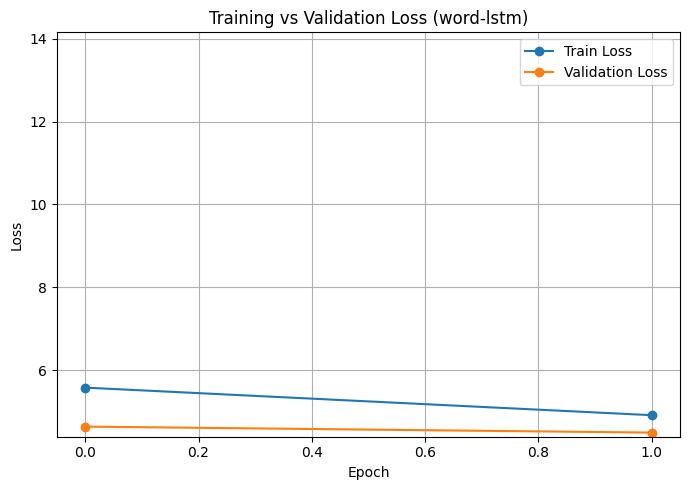

Saved plot to: results/pictures/word_lstm.png
Plotting bpe-transformer...


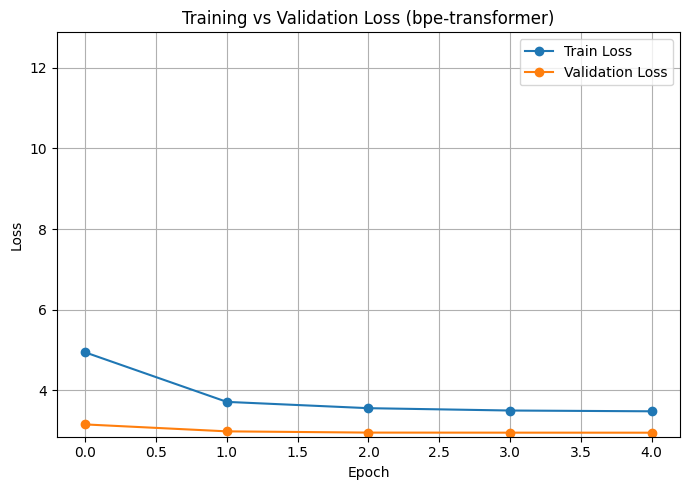

Saved plot to: results/pictures/bpe_transformer.png
Plotting bpe-lstm...


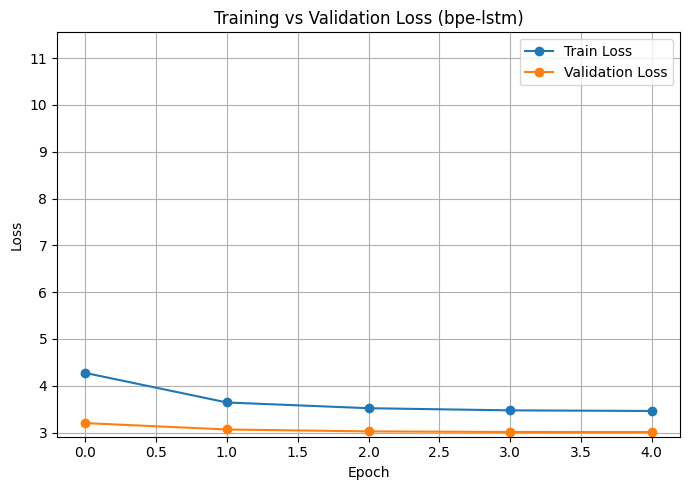

Saved plot to: results/pictures/bpe_lstm.png
Plotting unigram-transformer...


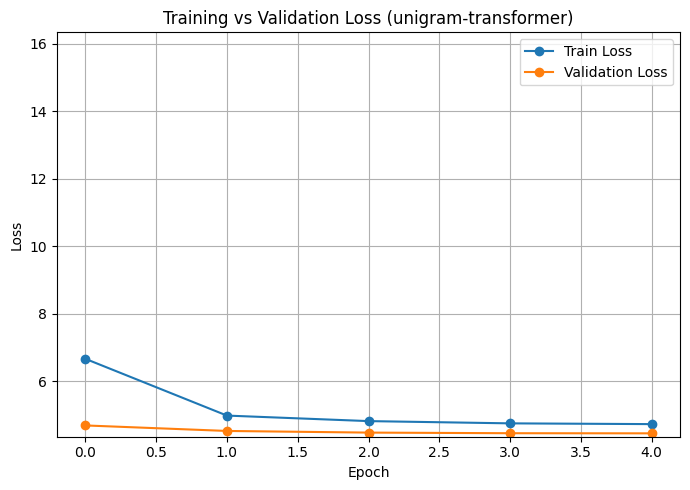

Saved plot to: results/pictures/unigram_transformer.png
Plotting unigram-lstm...


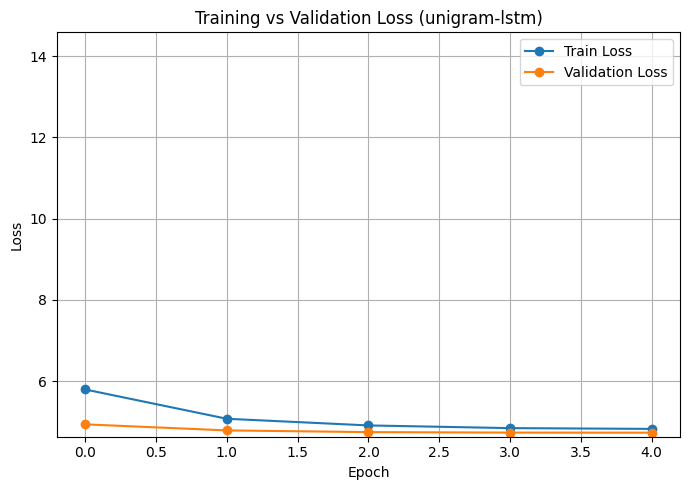

Saved plot to: results/pictures/unigram_lstm.png
Plotting byte-transformer...


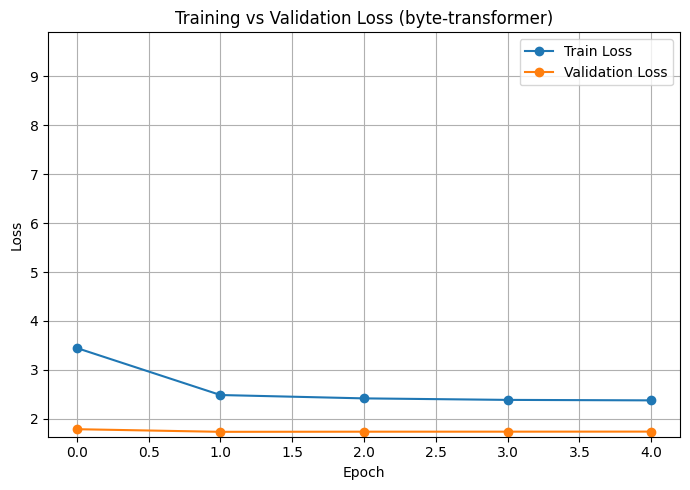

Saved plot to: results/pictures/byte_transformer.png
Plotting byte-lstm...


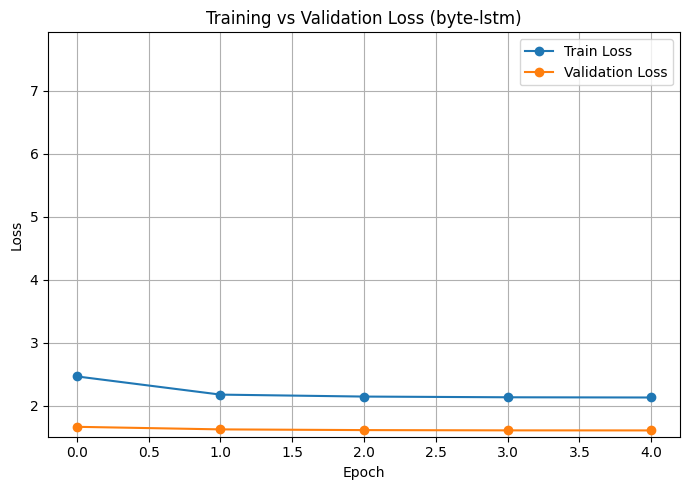

Saved plot to: results/pictures/byte_lstm.png


In [ ]:
tokenizers = ["word", "bpe", "unigram", "byte"]
model_types = ["transformer", "lstm"]

for tok in tokenizers:
    for model in model_types:
        print(f"Plotting {tok}-{model}...")
        plot_metrics(tok, model)   # uses your previous function